Faremos análise e exploração dos dados e preparação para aplicação do modelo de machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
from sklearn import preprocessing

# Mostrar todas as colunas dos dataframes
pd.set_option('display.max_columns', None)

In [2]:
# IMPORTAÇÃO DA BASE DE EMPRESAS - Estamos informando os tipos já identificados nas etapas anteriores.
colstype = {'cnpj': str, 'matriz_filial': 'category', 'razao_social': str, 'situacao': np.uint8, 'motivo_situacao': 'category',
'cod_nat_juridica': 'category', 'cnae_fiscal': 'category', 'uf': 'category', 'municipio': 'category', 'qualif_resp': 'category',
'porte': 'category', 'opc_simples': 'category', 'opc_mei': np.uint8, 'inexistente': np.uint8, 'anos_de_atividade_empresa': np.uint8,
'telefone_provavelmente_invalido': np.uint8, 'Atendimentos_Procon': np.uint32, 'empresa_devedora_uniao': np.uint8,
'empresa_venceu_licitacao': np.uint8, 'empresa_participou_licitacao': np.uint8, 'empresa_recurso_recebido_governo_federal': float,
'empresa_sancionada': np.uint8, 'qte_socios': np.uint32, 'tempo_de_sociedade': np.int32, 'auxilio_emergencial_bloqueado': np.int8, 
'socio_solicitou_auxilio_emergencial': np.int8, 'socio_solicitou_bolsa_familia': np.int8, 'socio_candidato': np.int8, 
'socio_devedor_uniao': np.int8, 'empresas_inexistentes_socio_participa': np.int32, 'qte_cnpj_socio_participa': np.int32,
'socio_pessoa_politicamente_exposta': np.int8, 'socio_recurso_recebido_governo_federal': float, 
'socio_solicitou_seguro_defeso': np.int8, 'socio_sancionado': np.int8, 'email_processado': 'category', 
'qte_empresas_com_mesmo_telefone': np.int32, 'telefone_preenchido': np.int8, 'qte_empresas_com_mesmo_endereco': np.int32}
empresas_df = pd.read_csv(r'C:\DATASETS\Empresas Rotuladas\empresas_rotuladas-processado.csv', dtype=colstype)

In [3]:
# Vamos dar uma olhada nos dados:
empresas_df

,cnpj,matriz_filial,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,porte,opc_simples,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco
0,00000942000170,1,NILZA LAVISO ARAUJO,8,67,2135,3299002,SP,PIRAJUI,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1
1,00001102000121,1,JOSE GERALDO PEREIRA SANTANA ME,8,67,2135,4729699,SP,PONTAL,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1
2,00005201000181,1,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,SAO PAULO,49,01,0,0,1,24,0,0,1,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.CNT.BR,1,1,1
3,00005201000262,2,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,MONTE ALEGRE DO SUL,49,01,0,0,1,17,0,0,0,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.COM.BR,1,1,1
4,00010501000159,1,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,8,15,2062,4681801,SP,PORTO FELIZ,49,01,0,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559938,98593668000194,1,AUTO VIACAO VENANCIO AIRES LTDA,2,00,2062,4922102,RS,VENANCIO AIRES,49,05,0,0,0,53,0,2,0,0,1,5818.65,0,6,6,0,0,0,0,0,0,6,0,0.00,0,0,VIASULBUS.COM.BR,2,1,1
1559939,98669997000252,2,E. R. AMANTINO INDUSTRIA METALURGICA LTDA,2,00,2062,2451200,RS,VERANOPOLIS,49,05,0,0,0,39,0,0,1,0,0,0.00,0,30,8,1,1,0,0,1,0,8,0,267066.01,0,0,ERAMANTINO.COM.BR,1,1,1
1559940,98670235000195,1,MAZZAROLLO - AGRO MAQUINAS LTDA,2,00,2062,4789099,RS,VERANOPOLIS,49,05,0,0,0,55,0,0,0,0,0,0.00,0,4,33,0,0,0,0,0,0,5,0,0.00,0,0,NI,0,0,1
1559941,98670656000116,1,RESTAURANTE FARINA LTDA,2,00,2062,5611201,RS,VERANOPOLIS,49,01,5,0,0,55,0,0,0,0,0,0.00,0,2,7,0,0,0,0,0,0,3,0,0.00,0,0,NI,0,0,1


Primeiras análises:

In [4]:
print('A base conta com {} empresas'.format(empresas_df.shape[0]) + ' e {} atributos'.format(empresas_df.shape[1]))

A base conta com 1559943 empresas e 39 atributos


In [5]:
# Verificando os tipos de dados:
empresas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559943 entries, 0 to 1559942
Data columns (total 39 columns):
cnpj                                        1559943 non-null object
matriz_filial                               1559943 non-null category
razao_social                                1559943 non-null object
situacao                                    1559943 non-null uint8
motivo_situacao                             1559943 non-null category
cod_nat_juridica                            1559943 non-null category
cnae_fiscal                                 1559943 non-null category
uf                                          1559943 non-null category
municipio                                   1559943 non-null category
qualif_resp                                 1559943 non-null category
porte                                       1559943 non-null category
opc_simples                                 1559943 non-null category
opc_mei                                     1559943 no

Temos 12 variáveis categóricas, sendo duas de identificação da empresa: cnpj e razao_social, e 27 variáveis numéricas, sendo 1 a predita (coluna 'inexistente'), que representa duas classes para classificação das empresas: 1 - inexistente de fato; 0 - existente de fato.

Antes de seguir com a exploração, vamos analisar e transformar as variáveis categóricas em variáveis numéricas, para permitir avaliar a correlação das variáveis.

## Variáveis categóricas:

### Coluna matriz_filial:

In [6]:
# Vamos ver os valores:
empresas_df.matriz_filial.value_counts()

1    1547369
2      12574
Name: matriz_filial, dtype: int64

Poucos valores, vamos usar o get_dummies:

In [7]:
empresas_df = pd.get_dummies(empresas_df,prefix=['filial'], 
                              columns = ['matriz_filial'], drop_first=True)
empresas_df.head(5)

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,porte,opc_simples,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2
0,00000942000170,NILZA LAVISO ARAUJO,8,67,2135,3299002,SP,PIRAJUI,50,01,6,0,1,24,0,0,0,0,0,0.0,0,1,5,0,1,0,0,0,1,1,0,0.0,0,0,NI,0,0,1,0
1,00001102000121,JOSE GERALDO PEREIRA SANTANA ME,8,67,2135,4729699,SP,PONTAL,50,01,6,0,1,24,0,0,0,0,0,0.0,0,1,5,0,1,0,0,0,1,1,0,0.0,0,0,NI,0,0,1,0
2,00005201000181,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,SAO PAULO,49,01,0,0,1,24,0,0,1,0,0,0.0,0,2,20,0,0,0,0,1,2,3,0,0.0,0,0,PETROALFA.CNT.BR,1,1,1,0
3,00005201000262,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,MONTE ALEGRE DO SUL,49,01,0,0,1,17,0,0,0,0,0,0.0,0,2,20,0,0,0,0,1,2,3,0,0.0,0,0,PETROALFA.COM.BR,1,1,1,1
4,00010501000159,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,8,15,2062,4681801,SP,PORTO FELIZ,49,01,0,0,1,24,0,0,0,0,0,0.0,0,1,5,0,1,0,0,0,1,1,0,0.0,0,0,NI,0,0,1,0


Observamos que foi criada a coluna 'filial_2', e excluída a coluna 'matriz_filial'. A coluna 'filial_2' representa: 1 - a empresa é filial; 0 - a empresa é matriz.

### Coluna motivo_situacao:

In [8]:
# Vamos ver os valores e dimensionalidade da variável:
empresas_df.motivo_situacao.value_counts()

67    1372057
00     167207
01       8831
63       5829
15       3226
02        810
16        690
71        308
73        306
54        175
18        159
21        123
64         72
36         25
74         21
70         21
10         17
37         14
04         11
05          8
17          8
34          6
72          5
07          3
11          3
06          2
14          2
09          1
80          1
61          1
24          1
Name: motivo_situacao, dtype: int64

In [9]:
# Como já é uma coluna com valores numéricos, poucos e de baixo valor, vamos por enquanto apenas convertê-la para inteiro, 
# e depois analisamos melhor:
empresas_df.motivo_situacao = empresas_df.motivo_situacao.astype(np.uint8)

### Coluna cod_nat_juridica:

In [10]:
# Vamos ver os valores e dimensionalidade da variável:
empresas_df.cod_nat_juridica.value_counts()

2135    1430198
2062      90698
2305      21979
2054       5835
3999       2304
         ...   
2330          1
2097          1
3255          1
8885          1
2089          1
Name: cod_nat_juridica, Length: 65, dtype: int64

Vamos usar ordinal encoder:

In [11]:
enc = preprocessing.OrdinalEncoder()
enc.fit(empresas_df[['cod_nat_juridica']])
empresas_df['cod_nat_juridica_enc'] = 
            enc.transform(empresas_df[['cod_nat_juridica']]).astype(int)
empresas_df

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,porte,opc_simples,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc
0,00000942000170,NILZA LAVISO ARAUJO,8,67,2135,3299002,SP,PIRAJUI,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35
1,00001102000121,JOSE GERALDO PEREIRA SANTANA ME,8,67,2135,4729699,SP,PONTAL,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35
2,00005201000181,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,SAO PAULO,49,01,0,0,1,24,0,0,1,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.CNT.BR,1,1,1,0,29
3,00005201000262,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,MONTE ALEGRE DO SUL,49,01,0,0,1,17,0,0,0,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.COM.BR,1,1,1,1,29
4,00010501000159,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,8,15,2062,4681801,SP,PORTO FELIZ,49,01,0,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559938,98593668000194,AUTO VIACAO VENANCIO AIRES LTDA,2,0,2062,4922102,RS,VENANCIO AIRES,49,05,0,0,0,53,0,2,0,0,1,5818.65,0,6,6,0,0,0,0,0,0,6,0,0.00,0,0,VIASULBUS.COM.BR,2,1,1,0,29
1559939,98669997000252,E. R. AMANTINO INDUSTRIA METALURGICA LTDA,2,0,2062,2451200,RS,VERANOPOLIS,49,05,0,0,0,39,0,0,1,0,0,0.00,0,30,8,1,1,0,0,1,0,8,0,267066.01,0,0,ERAMANTINO.COM.BR,1,1,1,1,29
1559940,98670235000195,MAZZAROLLO - AGRO MAQUINAS LTDA,2,0,2062,4789099,RS,VERANOPOLIS,49,05,0,0,0,55,0,0,0,0,0,0.00,0,4,33,0,0,0,0,0,0,5,0,0.00,0,0,NI,0,0,1,0,29
1559941,98670656000116,RESTAURANTE FARINA LTDA,2,0,2062,5611201,RS,VERANOPOLIS,49,01,5,0,0,55,0,0,0,0,0,0.00,0,2,7,0,0,0,0,0,0,3,0,0.00,0,0,NI,0,0,1,0,29


Foi criada a coluna 'cod_nat_juridica_enc' para representar o código da natureza jurídica.

### Coluna cnae_fiscal:

In [12]:
# Vamos ver os valores e dimensionalidade da variável:
empresas_df.cnae_fiscal.value_counts()

4781400    151887
9602501     93445
4399103     54139
5611203     46133
7911200     36747
            ...  
1922501         1
0892403         1
0152101         1
0116403         1
9603302         1
Name: cnae_fiscal, Length: 1232, dtype: int64

Como são muitos valores (e com números grandes que representam códigos), vamos usar ordinal encoder:

In [13]:
enc = preprocessing.OrdinalEncoder()
enc.fit(empresas_df[['cnae_fiscal']])
# Criação da variável numérica:
empresas_df['cnae_fiscal_enc'] = 
                   enc.transform(empresas_df[['cnae_fiscal']]).astype(int)
empresas_df

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,porte,opc_simples,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc
0,00000942000170,NILZA LAVISO ARAUJO,8,67,2135,3299002,SP,PIRAJUI,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35,475
1,00001102000121,JOSE GERALDO PEREIRA SANTANA ME,8,67,2135,4729699,SP,PONTAL,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35,746
2,00005201000181,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,SAO PAULO,49,01,0,0,1,24,0,0,1,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.CNT.BR,1,1,1,0,29,711
3,00005201000262,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,MONTE ALEGRE DO SUL,49,01,0,0,1,17,0,0,0,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.COM.BR,1,1,1,1,29,711
4,00010501000159,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,8,15,2062,4681801,SP,PORTO FELIZ,49,01,0,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,29,710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559938,98593668000194,AUTO VIACAO VENANCIO AIRES LTDA,2,0,2062,4922102,RS,VENANCIO AIRES,49,05,0,0,0,53,0,2,0,0,1,5818.65,0,6,6,0,0,0,0,0,0,6,0,0.00,0,0,VIASULBUS.COM.BR,2,1,1,0,29,814
1559939,98669997000252,E. R. AMANTINO INDUSTRIA METALURGICA LTDA,2,0,2062,2451200,RS,VERANOPOLIS,49,05,0,0,0,39,0,0,1,0,0,0.00,0,30,8,1,1,0,0,1,0,8,0,267066.01,0,0,ERAMANTINO.COM.BR,1,1,1,1,29,346
1559940,98670235000195,MAZZAROLLO - AGRO MAQUINAS LTDA,2,0,2062,4789099,RS,VERANOPOLIS,49,05,0,0,0,55,0,0,0,0,0,0.00,0,4,33,0,0,0,0,0,0,5,0,0.00,0,0,NI,0,0,1,0,29,806
1559941,98670656000116,RESTAURANTE FARINA LTDA,2,0,2062,5611201,RS,VERANOPOLIS,49,01,5,0,0,55,0,0,0,0,0,0.00,0,2,7,0,0,0,0,0,0,3,0,0.00,0,0,NI,0,0,1,0,29,884


### Coluna uf:

In [14]:
# Vamos ver os valores e dimensionalidade da variável:
empresas_df.uf.value_counts()

SP    411029
RJ    231155
MG    140327
BA     94877
RS     83490
PR     70916
GO     55759
PE     52122
PA     48356
CE     47399
SC     44965
ES     37071
DF     30869
MT     28375
MA     25288
MS     22218
AM     21750
RN     19343
PB     18757
AL     17759
PI     12091
RO     11646
TO     10918
SE      9671
AP      5163
AC      4980
RR      3623
EX        26
Name: uf, dtype: int64

Como é uma quantidade razoável de registros (e são string), vamos usar ordinal encoding:

In [16]:
enc = preprocessing.OrdinalEncoder()
enc.fit(empresas_df[['uf']])
# Criação da variável numérica:
empresas_df['uf_enc'] = enc.transform(empresas_df[['uf']]).astype(int)
empresas_df

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,porte,opc_simples,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc
0,00000942000170,NILZA LAVISO ARAUJO,8,67,2135,3299002,SP,PIRAJUI,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35,475,26
1,00001102000121,JOSE GERALDO PEREIRA SANTANA ME,8,67,2135,4729699,SP,PONTAL,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35,746,26
2,00005201000181,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,SAO PAULO,49,01,0,0,1,24,0,0,1,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.CNT.BR,1,1,1,0,29,711,26
3,00005201000262,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,MONTE ALEGRE DO SUL,49,01,0,0,1,17,0,0,0,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.COM.BR,1,1,1,1,29,711,26
4,00010501000159,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,8,15,2062,4681801,SP,PORTO FELIZ,49,01,0,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,29,710,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559938,98593668000194,AUTO VIACAO VENANCIO AIRES LTDA,2,0,2062,4922102,RS,VENANCIO AIRES,49,05,0,0,0,53,0,2,0,0,1,5818.65,0,6,6,0,0,0,0,0,0,6,0,0.00,0,0,VIASULBUS.COM.BR,2,1,1,0,29,814,23
1559939,98669997000252,E. R. AMANTINO INDUSTRIA METALURGICA LTDA,2,0,2062,2451200,RS,VERANOPOLIS,49,05,0,0,0,39,0,0,1,0,0,0.00,0,30,8,1,1,0,0,1,0,8,0,267066.01,0,0,ERAMANTINO.COM.BR,1,1,1,1,29,346,23
1559940,98670235000195,MAZZAROLLO - AGRO MAQUINAS LTDA,2,0,2062,4789099,RS,VERANOPOLIS,49,05,0,0,0,55,0,0,0,0,0,0.00,0,4,33,0,0,0,0,0,0,5,0,0.00,0,0,NI,0,0,1,0,29,806,23
1559941,98670656000116,RESTAURANTE FARINA LTDA,2,0,2062,5611201,RS,VERANOPOLIS,49,01,5,0,0,55,0,0,0,0,0,0.00,0,2,7,0,0,0,0,0,0,3,0,0.00,0,0,NI,0,0,1,0,29,884,23


### Coluna municipio:

In [17]:
# Vamos ver os valores e dimensionalidade da variável:
empresas_df.municipio.value_counts()

SAO PAULO                     143300
RIO DE JANEIRO                100113
SALVADOR                       36393
BRASILIA                       30869
BELO HORIZONTE                 30310
                               ...  
BERNARDINO BATISTA                 1
BREJOLANDIA                        1
SANTA FILOMENA DO MARANHAO         1
SAO BRAZ DO PIAUI                  1
OLIVEDOS                           1
Name: municipio, Length: 5280, dtype: int64

Como é uma quantidade grande de registros (e são string), vamos usar ordinal encoding:

In [19]:
enc = preprocessing.OrdinalEncoder()
enc.fit(empresas_df[['municipio']])
# Criação da variável numérica para representar os municípios:
empresas_df['municipio_enc'] = enc.transform(empresas_df[['municipio']])
                                        .astype(int)
empresas_df

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,porte,opc_simples,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc
0,00000942000170,NILZA LAVISO ARAUJO,8,67,2135,3299002,SP,PIRAJUI,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35,475,26,3658
1,00001102000121,JOSE GERALDO PEREIRA SANTANA ME,8,67,2135,4729699,SP,PONTAL,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35,746,26,3728
2,00005201000181,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,SAO PAULO,49,01,0,0,1,24,0,0,1,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.CNT.BR,1,1,1,0,29,711,26,4605
3,00005201000262,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,MONTE ALEGRE DO SUL,49,01,0,0,1,17,0,0,0,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.COM.BR,1,1,1,1,29,711,26,3000
4,00010501000159,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,8,15,2062,4681801,SP,PORTO FELIZ,49,01,0,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,29,710,26,3778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559938,98593668000194,AUTO VIACAO VENANCIO AIRES LTDA,2,0,2062,4922102,RS,VENANCIO AIRES,49,05,0,0,0,53,0,2,0,0,1,5818.65,0,6,6,0,0,0,0,0,0,6,0,0.00,0,0,VIASULBUS.COM.BR,2,1,1,0,29,814,23,5178
1559939,98669997000252,E. R. AMANTINO INDUSTRIA METALURGICA LTDA,2,0,2062,2451200,RS,VERANOPOLIS,49,05,0,0,0,39,0,0,1,0,0,0.00,0,30,8,1,1,0,0,1,0,8,0,267066.01,0,0,ERAMANTINO.COM.BR,1,1,1,1,29,346,23,5187
1559940,98670235000195,MAZZAROLLO - AGRO MAQUINAS LTDA,2,0,2062,4789099,RS,VERANOPOLIS,49,05,0,0,0,55,0,0,0,0,0,0.00,0,4,33,0,0,0,0,0,0,5,0,0.00,0,0,NI,0,0,1,0,29,806,23,5187
1559941,98670656000116,RESTAURANTE FARINA LTDA,2,0,2062,5611201,RS,VERANOPOLIS,49,01,5,0,0,55,0,0,0,0,0,0.00,0,2,7,0,0,0,0,0,0,3,0,0.00,0,0,NI,0,0,1,0,29,884,23,5187


### Coluna qualif_resp:

In [20]:
# Vamos ver os valores e dimensionalidade da variável:
empresas_df.qualif_resp.value_counts()

50    1430143
49      84712
65      21818
05       9932
16       7887
10       3956
19        475
64        463
59        227
12         62
17         59
13         57
28         42
11         35
34         26
42          9
32          8
00          5
39          5
40          5
31          5
23          3
51          2
36          2
43          2
54          2
24          1
Name: qualif_resp, dtype: int64

Vamos experimentar o orginal encoding:

In [21]:
enc = preprocessing.OrdinalEncoder()
enc.fit(empresas_df[['qualif_resp']])
# Criação da variável numérica que representa a qualificação do responsável da empresa
empresas_df['qualif_resp_enc'] =
                 enc.transform(empresas_df[['qualif_resp']]).astype(int)
empresas_df

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,porte,opc_simples,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc
0,00000942000170,NILZA LAVISO ARAUJO,8,67,2135,3299002,SP,PIRAJUI,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35,475,26,3658,21
1,00001102000121,JOSE GERALDO PEREIRA SANTANA ME,8,67,2135,4729699,SP,PONTAL,50,01,6,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35,746,26,3728,21
2,00005201000181,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,SAO PAULO,49,01,0,0,1,24,0,0,1,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.CNT.BR,1,1,1,0,29,711,26,4605,20
3,00005201000262,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,MONTE ALEGRE DO SUL,49,01,0,0,1,17,0,0,0,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,PETROALFA.COM.BR,1,1,1,1,29,711,26,3000,20
4,00010501000159,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,8,15,2062,4681801,SP,PORTO FELIZ,49,01,0,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,29,710,26,3778,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559938,98593668000194,AUTO VIACAO VENANCIO AIRES LTDA,2,0,2062,4922102,RS,VENANCIO AIRES,49,05,0,0,0,53,0,2,0,0,1,5818.65,0,6,6,0,0,0,0,0,0,6,0,0.00,0,0,VIASULBUS.COM.BR,2,1,1,0,29,814,23,5178,20
1559939,98669997000252,E. R. AMANTINO INDUSTRIA METALURGICA LTDA,2,0,2062,2451200,RS,VERANOPOLIS,49,05,0,0,0,39,0,0,1,0,0,0.00,0,30,8,1,1,0,0,1,0,8,0,267066.01,0,0,ERAMANTINO.COM.BR,1,1,1,1,29,346,23,5187,20
1559940,98670235000195,MAZZAROLLO - AGRO MAQUINAS LTDA,2,0,2062,4789099,RS,VERANOPOLIS,49,05,0,0,0,55,0,0,0,0,0,0.00,0,4,33,0,0,0,0,0,0,5,0,0.00,0,0,NI,0,0,1,0,29,806,23,5187,20
1559941,98670656000116,RESTAURANTE FARINA LTDA,2,0,2062,5611201,RS,VERANOPOLIS,49,01,5,0,0,55,0,0,0,0,0,0.00,0,2,7,0,0,0,0,0,0,3,0,0.00,0,0,NI,0,0,1,0,29,884,23,5187,20


### Coluna porte:

In [22]:
# Vamos ver os valores e dimensionalidade da variável:
empresas_df.porte.value_counts()

01    1493736
05      43857
03      22344
00          6
Name: porte, dtype: int64

In [23]:
# Por serem poucos valores diferentes, vamos usar o get_dummies, 
# sem o drop first (não vamos deixar excluir o 01, que é bem relevante):
empresas_df = pd.get_dummies(empresas_df,prefix=['porte'], 
                             columns = ['porte'], drop_first=False)
empresas_df.head(5)

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,opc_simples,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc,porte_01,porte_03,porte_05,porte_00
0,00000942000170,NILZA LAVISO ARAUJO,8,67,2135,3299002,SP,PIRAJUI,50,6,0,1,24,0,0,0,0,0,0.0,0,1,5,0,1,0,0,0,1,1,0,0.0,0,0,NI,0,0,1,0,35,475,26,3658,21,1,0,0,0
1,00001102000121,JOSE GERALDO PEREIRA SANTANA ME,8,67,2135,4729699,SP,PONTAL,50,6,0,1,24,0,0,0,0,0,0.0,0,1,5,0,1,0,0,0,1,1,0,0.0,0,0,NI,0,0,1,0,35,746,26,3728,21,1,0,0,0
2,00005201000181,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,SAO PAULO,49,0,0,1,24,0,0,1,0,0,0.0,0,2,20,0,0,0,0,1,2,3,0,0.0,0,0,PETROALFA.CNT.BR,1,1,1,0,29,711,26,4605,20,1,0,0,0
3,00005201000262,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,MONTE ALEGRE DO SUL,49,0,0,1,17,0,0,0,0,0,0.0,0,2,20,0,0,0,0,1,2,3,0,0.0,0,0,PETROALFA.COM.BR,1,1,1,1,29,711,26,3000,20,1,0,0,0
4,00010501000159,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,8,15,2062,4681801,SP,PORTO FELIZ,49,0,0,1,24,0,0,0,0,0,0.0,0,1,5,0,1,0,0,0,1,1,0,0.0,0,0,NI,0,0,1,0,29,710,26,3778,20,1,0,0,0


Verificamos que a coluna 'porte' foi removida, e foram criadas: porte_01, porte_03, porte_05, porte_00

### Coluna opc_simples:

In [24]:
# Vamos ver os valores e dimensionalidade da variável:
empresas_df.opc_simples.value_counts()

6    1399627
5     107901
0      52415
Name: opc_simples, dtype: int64

In [25]:
# Por serem poucos valores diferentes, vamos usar o get_dummies, 
# sem o drop first (não queremos excluir o '6', que é relevante)
empresas_df = pd.get_dummies(empresas_df,prefix=['opc_simples'], 
                             columns = ['opc_simples'], drop_first=False)
empresas_df.head(5)

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc,porte_01,porte_03,porte_05,porte_00,opc_simples_0,opc_simples_5,opc_simples_6
0,00000942000170,NILZA LAVISO ARAUJO,8,67,2135,3299002,SP,PIRAJUI,50,0,1,24,0,0,0,0,0,0.0,0,1,5,0,1,0,0,0,1,1,0,0.0,0,0,NI,0,0,1,0,35,475,26,3658,21,1,0,0,0,0,0,1
1,00001102000121,JOSE GERALDO PEREIRA SANTANA ME,8,67,2135,4729699,SP,PONTAL,50,0,1,24,0,0,0,0,0,0.0,0,1,5,0,1,0,0,0,1,1,0,0.0,0,0,NI,0,0,1,0,35,746,26,3728,21,1,0,0,0,0,0,1
2,00005201000181,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,SAO PAULO,49,0,1,24,0,0,1,0,0,0.0,0,2,20,0,0,0,0,1,2,3,0,0.0,0,0,PETROALFA.CNT.BR,1,1,1,0,29,711,26,4605,20,1,0,0,0,1,0,0
3,00005201000262,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,MONTE ALEGRE DO SUL,49,0,1,17,0,0,0,0,0,0.0,0,2,20,0,0,0,0,1,2,3,0,0.0,0,0,PETROALFA.COM.BR,1,1,1,1,29,711,26,3000,20,1,0,0,0,1,0,0
4,00010501000159,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,8,15,2062,4681801,SP,PORTO FELIZ,49,0,1,24,0,0,0,0,0,0.0,0,1,5,0,1,0,0,0,1,1,0,0.0,0,0,NI,0,0,1,0,29,710,26,3778,20,1,0,0,0,1,0,0


A coluna 'opc_simples' foi removida, e foram criadas: opc_simples_0, opc_simples_5, opc_simples_6

### Coluna email_processado:

In [26]:
# Vamos verificar os valores e a dimensionalidade da variável 'email_processado':
emails_df = empresas_df['email_processado'].value_counts().rename_axis('email').reset_index(name='qte')
emails_df

,email,qte
0,NI,611623
1,HOTMAIL.COM,447041
2,GMAIL.COM,188999
3,YAHOO.COM.BR,71222
4,BOL.COM.BR,29532
...,...,...
52995,TOPMASTERLOCADORA.COM.BR,1
52996,TOPLIGHTBH.COM.BR,1
52997,TOPFORMPLASTICS.COM.BR,1
52998,TOP4CONTADORES.COM.BR,1


Contém uma grande dimensionalidade (53.000 linhas), são milhares de domínios de e-mail extraídos (em etapa anterior) dos e-mails preenchidos pelas empresas.<br>
O que nos interessa nessa variável é diferenciar: 1) se o e-mail foi preenchido ou não (se está com NI ou outra coisa); 2) se o e-mail preenchido é de domínio comum (ex: google.com, hotmail.com) ou específico (ex: santanense.com.br).<br>Para contornar a  grande dimensionalidade, podemos reduzi-la agrupando os e-mails específicos (que são muitos). Os emails de domínio comum são poucos.<br>Vamos primeiro identificar os e-mails comuns:

In [27]:
emails_df[emails_df.qte>100]

,email,qte
0,NI,611623
1,HOTMAIL.COM,447041
2,GMAIL.COM,188999
3,YAHOO.COM.BR,71222
4,BOL.COM.BR,29532
5,IG.COM.BR,23836
6,TERRA.COM.BR,12683
7,UOL.COM.BR,12306
8,OUTLOOK.COM,10901
9,LIVE.COM,10080


Percebemos que de fato são e-mails de grandes provedores populares (gmail, hotmail, yahoo, etc). Percebemos também erros e variações nos nomes dos domínios (ex: HOYMAIL.COM, HOOTMAIL.COM, HOTMAIL.COM, HOTMAIL.COM.BR). Vamos fazer as correções e ajustar os semelhantes para um domínio comum.<br>Primeiro, vamos identificar os erros e variações, usando expressão regular:

In [28]:
# Identificando e-mails do YAHOO errados:
emails_df[emails_df.email.str.contains('[YAHO]{3,6}')].head(50).email

3                    YAHOO.COM.BR
12                      YAHOO.COM
55                   YHAOO.COM.BR
94                    YHOO.COM.BR
104                 YAHOOL.COM.BR
144                   YAHOO.COMBR
157                   YAOO.COM.BR
169                      YAHOO.FR
183                   YAHO.COM.BR
195        NOVOHORIZONTESP.COM.BR
199                   YAHOO.CO.UK
219        INTERCITYHOTEIS.COM.BR
236        ATLANTICAHOTELS.COM.BR
250                      YAHOO.ES
255                   YAHOO.CO.BR
275                  YAHHO.COM.BR
316                   YAHOO.OM.BR
338            ATRIOHOTEIS.COM.BR
361                   YAHOO.COM.B
380                 YAHOOO.COM.BR
432                   HOYMAIL.COM
470                  YAHOO.COM.AR
474                      YAHOO.IT
494         SLAVIEROHOTEIS.COM.BR
530                  HOOTMAIL.COM
550                   YAHOOCOM.BR
624        ALPHAASSESSORIA.COM.BR
642                    YAHOOL.COM
666                  YAOOL.COM.BR
676           

In [29]:
# Identificando e-mails do HOTMAIL errados:
emails_df[emails_df.email.str.contains('[HOTMAIL]{3,9}')].head(50).email

1                HOTMAIL.COM
2                  GMAIL.COM
3               YAHOO.COM.BR
8                OUTLOOK.COM
10            HOTMAIL.COM.BR
12                 YAHOO.COM
17                 YMAIL.COM
18              GMAIL.COM.BR
21            OUTLOOK.COM.BR
22             GLOBOMAIL.COM
28                HOTMAI.COM
29            ZIPMAIL.COM.BR
30          VELOXMAIL.COM.BR
31                HOMAIL.COM
36                HOTMAL.COM
39            ROCKETMAIL.COM
40                 GAMIL.COM
41                  MAIL.COM
42               HOTAMIL.COM
43                HTMAIL.COM
44                HOTMIL.COM
45                  GMAI.COM
50          SERCOMTEL.COM.BR
51              HOTIMAIL.COM
53                HOTMAIL.IT
54              HOTAMAIL.COM
55              YHAOO.COM.BR
56              COAMO.COM.BR
58               HOTMIAL.COM
61                  GMAL.COM
64                NAOTEM.COM
66                OTMAIL.COM
68                HOTMAIL.CO
69               HORMAIL.COM
70       CONTA

In [30]:
# Identificando e-mails do GMAIL errados:
emails_df[emails_df.email.str.contains('[GMAIL]{3,9}')].head(50).email

1                    HOTMAIL.COM
2                      GMAIL.COM
10                HOTMAIL.COM.BR
17                     YMAIL.COM
18                  GMAIL.COM.BR
22                 GLOBOMAIL.COM
28                    HOTMAI.COM
29                ZIPMAIL.COM.BR
30              VELOXMAIL.COM.BR
31                    HOMAIL.COM
36                    HOTMAL.COM
39                ROCKETMAIL.COM
40                     GAMIL.COM
41                      MAIL.COM
42                   HOTAMIL.COM
43                    HTMAIL.COM
44                    HOTMIL.COM
45                      GMAI.COM
51                  HOTIMAIL.COM
53                    HOTMAIL.IT
54                  HOTAMAIL.COM
58                   HOTMIAL.COM
61                      GMAL.COM
66                    OTMAIL.COM
68                    HOTMAIL.CO
69                   HORMAIL.COM
70           CONTABILIZEI.COM.BR
73                     EMAIL.COM
75                 HOTMAIL.CO.UK
76                   HTOMAIL.COM
78        

Foram analisados os resultados acima e foram experimentadas outras variações de expressão regular e encontradas as seguintes necessidades de correção:

In [31]:
# Correção e ajuste YAHOO
subst = ['YAHOO.COM.BRR', 'YAHOO.COM.BRR', 'YHOO.COM.BR', 'YAHOOL.COM.BR', 'YAHOO.COMBR', 'YAOO.COM.BR', 'YAHO.COM.BR', 'YAHOO.CO.BR', 'YAHHO.COM.BR', 'YAHOO.OM.BR',
'YAHOO.COM.B', 'YAHOOO.COM.BR', 'YAHOOCOM.BR', 'YAHOOL.COM', 'YAOOL.COM.BR', 'YHAOO.COM', 'YOHOO.COM.BR', 'YAHOO.COM.R',
'YAHOO.COM.BRC', 'YAHHO.COM', 'UAHOO.COM.BR', 'YAHOO.COM,BR', 'YAHOO.CON.BR', 'YAHOO.COM.BE', 'HAYOO.COM.BR', 'YAHOO.COM.NR',
'YAHOO.COM.BRC', 'YAHOO.BR', 'YHOO.COM', 'YAOO.COM', 'YAHOO.CO', 'YANHOO.COM.BR', 'YAHOO.COM', 'YMAIL.COM', 'YHAOO.COM.BR', 
'YAHOO.CM.BR', 'YAHOO.COM.BR.UK', 'YAHOO.COM.BRM.AR', 'YAHOO.COM.BRRC', 'YMAIL.COM', 'YMAIL.COM.BR']

# Convertendo tudo para YAHOO.COM.BR
empresas_df['email_processado'] = empresas_df.email_processado.str
        .replace('^(' + '|'.join(subst) + ')$', 'YAHOO.COM.BR', regex=True) 

In [32]:
# Correção e ajuste HOTMAIL
subst = ['HOTMAIL.COM.BR', 'HOTMAI.COM', 'HOMAIL.COM', 'HOTMAL.COM', 'HOTAMIL.COM', 'HTMAIL.COM', 'HOTMIL.COM', 'HOTIMAIL.COM',
         'HOTAMAIL.COM', 'HOTMIAL.COM', 'OTMAIL.COM', 'HOTMAIL.CO', 'HORMAIL.COM', 'HTOMAIL.COM', 'ROTMAIL.COM', 'HOTMAIL.OM', 
         'HOTAIL.COM', 'HOTNAIL.COM', 'HPTMAIL.COM', ' HOTMAIL.COM', 'HOTMNAIL.COM', 'HOITMAIL.COM', 'HOTMAILO.COM', 
         'HOTMAIL.COM.COM', 'HOTRMAIL.COM', 'HORTMAIL.COM', 'HOTMAIIL.COM', 'HOT.MAIL.COM', 'HOTMAIL.COMC', 'HOTMAIL.CON',
         'HOT.COM', 'HOMTAIL.COM', 'HOTMAOL.COM', 'HOTMAIL.CM', 'HOTMIAL.COM', 'HOTMAILL.COM', 'HOTIMAIL.COM.BR',
         'HOTMAIL.COMP', 'HOTMAIL.COML', 'HOPTMAIL.COM', 'HOTMAIOL.COM', 'HOLTMAIL.COM', 'HOOTMAIL.COM']

# Convertendo tudo para HOTMAIL.COM
empresas_df['email_processado'] = empresas_df.email_processado.str
         .replace('^(' + '|'.join(subst) + ')$', 'HOTMAIL.COM', regex=True) 

In [33]:
# Correção e ajuste GMAIL
subst = ['GMAIL.COM.BR', 'GAMIL.COM', 'GMAI.COM', 'GMAL.COM', 'GAMAIL.COM', 'GMAILL.COM', 'GEMAIL.COM', 'GMIL.COM', 'GMAIL.COM.COM',
        'GAIL.COM', 'GMIAL.COM', 'GMAIL.OM', 'GMAIL.CM', 'GNAIL.COM', 'GMAIL.CO']

# Convertendo tudo para GMAIL.COM
empresas_df['email_processado'] = empresas_df.email_processado.str
          .replace('^(' + '|'.join(subst) + ')$', 'GMAIL.COM', regex=True) 

In [34]:
# Outras correções e ajustes:
replace_values = {'OI.COM': 'OI.COM.BR', 'OI.NET.BR': 'OI.COM.BR', 'OUTLOOK.COM.BR': 'OUTLOOK.COM', 'OUTLLOK.COM': 'OUTLOOK.COM',
'BOL.COM': 'BOL.COM.BR', 'BOOL.COM.BR': 'BOL.COM.BR', 'BO.COM.BR': 'BOL.COM.BR', 'IG.COMBR': 'IG.COM.BR', 'IG.COM.B': 'IG.COM.BR', 'IG.COM': 'IG.COM.BR',
'ZIPMAIL.COM': 'ZIPMAIL.COM.BR', 'OUTOOK.COM': 'OUTLOOK.COM', 'OTLOOK.COM': 'OUTLOOK.COM', 'AUTLOOK.COM': 'OUTLOOK.COM', 'OUTLOK.COM': 'OUTLOOK.COM',
'POP.COM': 'POP.COM.BR', 'BRTURBO.COM': 'BRTURBO.COM.BR', 'TERRA.COM': 'TERRA.COM.BR', 'UOL.COM': 'UOL.COM.BR'}
empresas_df = empresas_df.replace({"email_processado": replace_values}) 

Após feitas as correções e ajustes:

In [35]:
# Refazendo a consolidação dos domínios:
emails_df = empresas_df['email_processado'].value_counts().rename_axis('email').reset_index(name='qte')
print('Temos {} domínios.'.format(emails_df.shape[0]))

# Reverificando quais são os domínios comuns:
print('Domínios comuns (qte>100):')
print(emails_df[emails_df.qte>100].shape[0])
emails_df[emails_df.qte>100]

Temos 52867 domínios.
Domínios comuns (qte>100):
40


,email,qte
0,NI,611623
1,HOTMAIL.COM,457442
2,GMAIL.COM,191415
3,YAHOO.COM.BR,78782
4,BOL.COM.BR,29982
5,IG.COM.BR,23998
6,TERRA.COM.BR,12778
7,UOL.COM.BR,12404
8,OUTLOOK.COM,12118
9,LIVE.COM,10080


Obs: foram preservados e-mails comuns estrangeiros, como hotmail.it.

Acima, temos então 39 domínios de e-mail que são bastante utilizados pelas empresas brasileiras. Hotmail sendo disparadamente o mais popular. Temos também grande quantidade de empresas que não informaram nenhum e-mail (o 'NI', de não-informado).

Vamos observar a outra ponta do dataset, com os domínios mais específicos (qte<=100):

In [36]:
emails_outros_df = emails_df[emails_df.qte<=100]
print('Domínios mais específicos:')
print(emails_outros_df.shape[0])
emails_outros_df.head(50)

Domínios mais específicos:
52827


,email,qte
40,LIVE.COM.BR,100
41,LIVE.COM.PT,96
42,NAOTEM.COM,95
43,COOPERCITRUS.COM.BR,93
44,VIAVALE.COM.BR,93
45,NETNEW.COM.BR,87
46,AOL.COM,87
47,CONTABILIZEI.COM.BR,87
48,ICLARO.COM.BR,86
49,HOTMAIL.CO.UK,86


A primeira parte concentra 39 domínios populares, e a segunda parte mais de 52.000 domínios mais específicos (ainda há mistura, conforme verificado a seguir).<br>
Observa-se também que os e-mails comuns estão mais bem definidos na faixa superior 'qte >= 119' (HOTMAIL.IT).<br>
Abaixo disso, misturam-se alguns e-mails menos comuns (como AOL, FOLHA, ESTADAO) e emails de pequenos provedores de internet, associações e empresas (e-mails específicos).

Precisamos identificar um ponto de corte, abaixo do qual teremos os domínios com 'qte' menor, que poderão ser agrupados. Vamos aprofundar a análise:

Text(0, 0.5, 'Qte de domínios de e-mail')

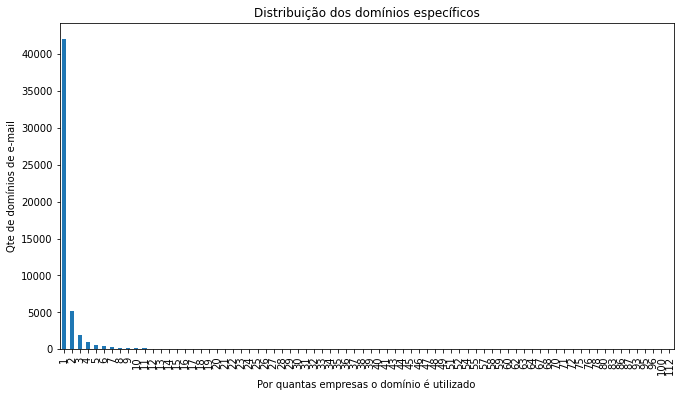

In [37]:
# Como já vimos acima que os e-mails mais específicos começam a surgir 
# de qte < 119, então vamos visualizar, dentro dessa faixa (1<=qte<119),
# a frequência do campo emails_df.qte, que nos mostrará como estão 
# distribuídos os domínios mais específicos (que é o que queremos agrupar). Isso nos dará uma melhor visão de como agrupá-los.
fig = plt.figure(figsize=(11,6))
fig = emails_df[emails_df['qte']<119].qte.value_counts().sort_index().plot
                                                                     .bar()
fig.set_title('Distribuição dos domínios específicos')
fig.set_xlabel('Por quantas empresas o domínio é utilizado')
fig.set_ylabel('Qte de domínios de e-mail')

Quanto mais à esquerda, mais específico é o domínio do e-mail. Quanto mais à direito, mais comum ele é.<br>
Pelo gráfico acima, observamos que a grande maioria dos domínios são bem específicos (primeira barra da esqueda para a direita), ou seja, são mais de 40.000 domínios (isso significa que mais de 40.000 empresas informaram um e-mail aparentemente de domínio próprio delas).<br> Na sequência (caminhando para a direita nas barras do gráfico), ainda conseguimos visualizar qte significativa de domínios para as situações de 2 a 11 empresas compartilhando o mesmo domínio. A partir daí, fica pouco significante.<br> Vamos visualizar numericamente:

In [38]:
# Distribuição da utilização de mesmo domínio pelas empresas:
emails_df.qte.value_counts().head(50)

1     42139
2      5160
3      1919
4      1012
5       600
6       404
7       311
8       213
9       180
10      108
11       97
12       83
13       78
14       61
15       45
16       42
17       35
19       26
18       24
20       23
22       21
23       21
25       14
21       14
24       14
29       13
30       10
27       10
26        9
35        9
34        9
38        8
32        8
28        7
47        6
46        6
33        6
31        6
36        5
40        4
59        4
37        4
57        4
48        3
39        3
43        3
86        3
58        3
52        3
87        3
Name: qte, dtype: int64

Explicando melhor os dados: a coluna à esquerda representa a quantidade de empresas que usam um mesmo domínio, e a coluna à direita representa quantos domínios (ou quantas empresas) se enquadram em cada situação da primeira coluna. Por exemplo, na primeira linha: na situação em que apenas 1 empresa utiliza um determinado domínio, temos 42.139 domínios (ou empresas). Esse é exatamente o caso de domínio estritamente específico.

Avaliando os dados anteriores, temos o seguinte insight de critérios para agrupar os domínios:<br>
* Se o domínio de e-mail é super específico (apenas 1 empresa utiliza aquele domínio), será chamado de 'ESPECÍFICO 1' - esse grupo cobre o grande outlier da distribuição mostrada anteriormente (a barra mais à esquerda do gráfico);
* Se o domínio de e-mail é utilizado por de 2 a 4 empresas, será 'ESPECÍFICO 2' - esse grupo cobre as barras que estão na casa dos milhares;
* Se o domínio de e-mail é utilizado por de 5 a 10 empresas, será 'ESPECÍFICO 3' - esse grupo cobre as barras que estão na casa das centenas;
* Se o domínio de e-mail é utilizado por de 11 a 118 empresas, será 'OUTROS' - esse grupo cobre as demais barras;

In [39]:
# Fazendo seleção dos domínios conforme os critérios descritos:
emails_especifico1_df = emails_df[emails_df.qte == 1]
emails_especifico2_df = emails_df[(emails_df.qte >= 2)&(emails_df.qte <= 4)]
emails_especifico3_df = emails_df[(emails_df.qte >= 5)&(emails_df.qte <= 10)]
emails_outros_df = emails_df[(emails_df.qte >= 11)&(emails_df.qte <= 118)]

# Quantidade de domínios em cada grupo:
print('ESPECÍFICO 1: ', emails_especifico1_df.shape[0], ' - ESPECÍFICO 2: ', emails_especifico2_df.shape[0], 
      ' - ESPECÍFICO 3: ', emails_especifico3_df.shape[0], ' - OUTROS: ', emails_outros_df.shape[0])

# Alterando o dataset de empresas para substituir o domínio pelo respectivo grupo:
empresas_df['email_processado'] = np.where(empresas_df['email_processado'].isin(emails_especifico1_df.email), 'ESPECIFICO 1', empresas_df['email_processado'])
empresas_df['email_processado'] = np.where(empresas_df['email_processado'].isin(emails_especifico2_df.email), 'ESPECIFICO 2', empresas_df['email_processado'])
empresas_df['email_processado'] = np.where(empresas_df['email_processado'].isin(emails_especifico3_df.email), 'ESPECIFICO 3', empresas_df['email_processado'])
empresas_df['email_processado'] = np.where(empresas_df['email_processado'].isin(emails_outros_df.email), 'OUTROS', empresas_df['email_processado'])

# Quantidade de empresas em cada domínio ou grupo:
empresas_df['email_processado'].value_counts()

ESPECÍFICO 1:  42139  - ESPECÍFICO 2:  8091  - ESPECÍFICO 3:  1816  - OUTROS:  783


NI                    611623
HOTMAIL.COM           457442
GMAIL.COM             191415
YAHOO.COM.BR           78782
ESPECIFICO 1           42139
BOL.COM.BR             29982
IG.COM.BR              23998
ESPECIFICO 2           20125
OUTROS                 17348
TERRA.COM.BR           12778
UOL.COM.BR             12404
OUTLOOK.COM            12118
ESPECIFICO 3           12005
LIVE.COM               10080
OI.COM.BR               5877
R7.COM                  3490
GLOBO.COM               2882
MSN.COM                 2370
IBEST.COM.BR            1945
BRTURBO.COM.BR          1317
NETSITE.COM.BR          1178
GLOBOMAIL.COM           1069
ITELEFONICA.COM.BR       869
POP.COM.BR               834
ICLOUD.COM               622
UAI.COM.BR               581
SUPERIG.COM.BR           574
ZIPMAIL.COM.BR           559
VELOXMAIL.COM.BR         528
CVC.COM.BR               383
CLICK21.COM.BR           378
ME.COM                   349
NT.COM.BR                308
FACEBOOK.COM             302
ROCKETMAIL.COM

Conforme visto acima, reduzimos bastante a dimensionalidade da coluna email_processado. Podemos aplicar Ordinal Encoding:

In [40]:
# Orginal encoding do email_processado:
enc = preprocessing.OrdinalEncoder()
enc.fit(empresas_df[['email_processado']])
empresas_df['email_enc'] =
               enc.transform(empresas_df[['email_processado']]).astype(int)
empresas_df

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc,porte_01,porte_03,porte_05,porte_00,opc_simples_0,opc_simples_5,opc_simples_6,email_enc
0,00000942000170,NILZA LAVISO ARAUJO,8,67,2135,3299002,SP,PIRAJUI,50,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35,475,26,3658,21,1,0,0,0,0,0,1,24
1,00001102000121,JOSE GERALDO PEREIRA SANTANA ME,8,67,2135,4729699,SP,PONTAL,50,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,35,746,26,3728,21,1,0,0,0,0,0,1,24
2,00005201000181,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,SAO PAULO,49,0,1,24,0,0,1,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,ESPECIFICO 1,1,1,1,0,29,711,26,4605,20,1,0,0,0,1,0,0,5
3,00005201000262,PETRO-ALFA COMERCIO DE DERIVADOS DE PETROLEO LTDA,8,15,2062,4681802,SP,MONTE ALEGRE DO SUL,49,0,1,17,0,0,0,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,ESPECIFICO 1,1,1,1,1,29,711,26,3000,20,1,0,0,0,1,0,0,5
4,00010501000159,B S PETRO COM E DIST DE DERIVADOS DE PETROLEO ...,8,15,2062,4681801,SP,PORTO FELIZ,49,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,NI,0,0,1,0,29,710,26,3778,20,1,0,0,0,1,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559938,98593668000194,AUTO VIACAO VENANCIO AIRES LTDA,2,0,2062,4922102,RS,VENANCIO AIRES,49,0,0,53,0,2,0,0,1,5818.65,0,6,6,0,0,0,0,0,0,6,0,0.00,0,0,ESPECIFICO 2,2,1,1,0,29,814,23,5178,20,0,0,1,0,1,0,0,6
1559939,98669997000252,E. R. AMANTINO INDUSTRIA METALURGICA LTDA,2,0,2062,2451200,RS,VERANOPOLIS,49,0,0,39,0,0,1,0,0,0.00,0,30,8,1,1,0,0,1,0,8,0,267066.01,0,0,ESPECIFICO 1,1,1,1,1,29,346,23,5187,20,0,0,1,0,1,0,0,5
1559940,98670235000195,MAZZAROLLO - AGRO MAQUINAS LTDA,2,0,2062,4789099,RS,VERANOPOLIS,49,0,0,55,0,0,0,0,0,0.00,0,4,33,0,0,0,0,0,0,5,0,0.00,0,0,NI,0,0,1,0,29,806,23,5187,20,0,0,1,0,1,0,0,24
1559941,98670656000116,RESTAURANTE FARINA LTDA,2,0,2062,5611201,RS,VERANOPOLIS,49,0,0,55,0,0,0,0,0,0.00,0,2,7,0,0,0,0,0,0,3,0,0.00,0,0,NI,0,0,1,0,29,884,23,5187,20,1,0,0,0,0,1,0,24


Foi criada a coluna 'email_enc' para representar numericamente o domínio de e-mail de cada empresa.

In [41]:
# Correlação entre o domínio de e-mail e a variável target:
empresas_df[['email_enc','inexistente']].corr()

,email_enc,inexistente
email_enc,1.000000,0.077454
inexistente,0.077454,1.000000


Fim da análise do e-mail.

### Vamos ver como ficaram as variáveis da base após os encodings:

In [42]:
empresas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559943 entries, 0 to 1559942
Data columns (total 50 columns):
cnpj                                        1559943 non-null object
razao_social                                1559943 non-null object
situacao                                    1559943 non-null uint8
motivo_situacao                             1559943 non-null uint8
cod_nat_juridica                            1559943 non-null category
cnae_fiscal                                 1559943 non-null category
uf                                          1559943 non-null category
municipio                                   1559943 non-null category
qualif_resp                                 1559943 non-null category
opc_mei                                     1559943 non-null uint8
inexistente                                 1559943 non-null uint8
anos_de_atividade_empresa                   1559943 non-null uint8
telefone_provavelmente_invalido             1559943 non-null uint8

Ainda temos algumas colunas originais que serão posteriormente removidas (ex: cnpj, razao_social).

In [43]:
# Vamos ver as estatísticas:
empresas_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
situacao,1559943.0,7.337326e+00,1.873124e+00,1.00,8.0,8.0,8.0,8.000000e+00
motivo_situacao,1559943.0,5.925492e+01,2.134073e+01,0.00,67.0,67.0,67.0,8.000000e+01
opc_mei,1559943.0,1.724358e-02,1.301778e-01,0.00,0.0,0.0,0.0,1.000000e+00
inexistente,1559943.0,8.820047e-01,3.226027e-01,0.00,1.0,1.0,1.0,1.000000e+00
anos_de_atividade_empresa,1559943.0,6.973359e+00,5.267015e+00,0.00,5.0,6.0,7.0,1.300000e+02
telefone_provavelmente_invalido,1559943.0,5.415582e-03,7.339113e-02,0.00,0.0,0.0,0.0,1.000000e+00
Atendimentos_Procon,1559943.0,7.246521e-01,1.270590e+02,0.00,0.0,0.0,0.0,7.802300e+04
empresa_devedora_uniao,1559943.0,2.470988e-02,1.552395e-01,0.00,0.0,0.0,0.0,1.000000e+00
empresa_venceu_licitacao,1559943.0,5.914960e-03,7.668101e-02,0.00,0.0,0.0,0.0,1.000000e+00
empresa_participou_licitacao,1559943.0,7.220777e-03,8.466783e-02,0.00,0.0,0.0,0.0,1.000000e+00


Pelos dados anteriores, percebemos:<br>
- Todas as colunas estão não nulas;
- Variáveis binárias estão conforme esperado: mínimo 0, máximo 1;
- Variável 'anos_de_atividade_empresa' entre 0 e 130 (esse máximo já foi previamente verificado: empresa Santanense);
- Variável 'tempo_de_sociedade' entre 0 e 86. Coerente.
- Variável 'socio_recurso_recebido_governo_federal' entre -1.381.239,74 e 518.663.400.000,00. Esses máximos e mínimos foram conferidos, conforme mostrado abaixo.
- Variável 'empresa_recurso_recebido_governo_federal' entre -38.769.302,67 e 689.777.300.000,00. Esses máximos e mínimos foram conferidos, conforme mostrado abaixo;
- Variável 'qte_cnpj_socio_participa' tem um máximo de 13.559. Verificado conforme mostrado abaixo.
- Demais colunas conferidas.

### Conferência de alguns valores:

##### Conferindo valor mínimo do 'socio_recurso_recebido_governo_federal' (-1.381.239,74):

In [44]:
empresas_df[empresas_df['socio_recurso_recebido_governo_federal']<= -1000000]

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc,porte_01,porte_03,porte_05,porte_00,opc_simples_0,opc_simples_5,opc_simples_6,email_enc
1399984,04580657000126,EQUINOR ENERGY DO BRASIL LTDA.,2,0,2062,0600001,RJ,RIO DE JANEIRO,05,0,0,20,0,0,0,0,0,0.0,0,8,7,0,0,0,0,1,0,31,0,-1381239.74,0,0,ESPECIFICO 1,2,1,1,0,29,95,19,4006,1,0,0,1,0,1,0,0,5


Em consulta ao site www.transparencia.gov.br, verificou-se que a empresa em questão é sócia de outra empresa que realizou estorno de valores recebidos do Governo Federal:<br>
![alt text](ADE_Equinor_Estorno_Recurso.png "Estorno de recurso")<br>
Link: http://transparencia.gov.br/despesas/favorecido?faseDespesa=3&favorecido=43607128&ordenarPor=valor&direcao=desc<br>
Ou seja, valor correto.

##### Conferindo valor máximo do 'socio_recurso_recebido_governo_federal' (518.663.400.000,00):

In [45]:
empresas_df[empresas_df['socio_recurso_recebido_governo_federal']>= 500000000000]

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc,porte_01,porte_03,porte_05,porte_00,opc_simples_0,opc_simples_5,opc_simples_6,email_enc
1500754,28152684000166,BBTUR VIAGENS E TURISMO LTDA,2,0,2062,7911200,DF,BRASILIA,13,0,0,39,0,0,1,0,1,4106564.60,0,3,6,0,0,0,0,1,0,58,0,5.186634e+11,0,0,ESPECIFICO 2,2,1,1,0,29,1060,6,705,5,0,0,1,0,1,0,0,6
1500755,28152684000247,BBTUR VIAGENS E TURISMO LTDA,2,0,2062,7911200,DF,BRASILIA,13,0,0,34,0,0,0,0,0,0.00,0,3,6,0,0,0,0,1,0,58,0,5.186634e+11,0,0,ESPECIFICO 2,2,1,1,1,29,1060,6,705,5,0,0,1,0,1,0,0,6
1500756,28152684001480,BBTUR VIAGENS E TURISMO LTDA,2,0,2062,7911200,RJ,RIO DE JANEIRO,13,0,0,30,0,0,0,0,1,-17731.93,0,3,6,0,0,0,0,1,0,58,0,5.186634e+11,0,0,ESPECIFICO 2,2,1,1,1,29,1060,19,4006,5,0,0,1,0,1,0,0,6
1500757,28152684002452,BBTUR VIAGENS E TURISMO LTDA,2,0,2062,7911200,RJ,RIO DE JANEIRO,13,0,0,28,0,0,0,0,0,0.00,0,3,6,0,0,0,0,1,0,58,0,5.186634e+11,0,0,NI,2,1,1,1,29,1060,19,4006,5,0,0,1,0,1,0,0,24
1500758,28152684004900,BBTUR VIAGENS E TURISMO LTDA,2,0,2062,8230001,DF,BRASILIA,13,0,0,15,0,0,0,0,0,0.00,0,3,6,0,0,0,0,1,0,58,0,5.186634e+11,0,0,ESPECIFICO 2,1,1,1,1,29,1079,6,705,5,0,0,1,0,1,0,0,6


O valor acima parece exagerado (518bi), mas verificou-se que os CNPJs em questão têm como sócio o Banco do Brasil, que por sua vez recebeu grandes montantes de recursos do Governo Federal, como se pode ver na amostra de consulta ao site www.transparencia.gov.br:
![alt text](AED_Recursos_Recebidos_BB.png "Recursos recebidos BB")<br>
Link: http://transparencia.gov.br/despesas/favorecido?paginacaoSimples=true&tamanhoPagina=&offset=&direcaoOrdenacao=asc&colunasSelecionadas=data%2CdocumentoResumido%2ClocalizadorGasto%2Cfase%2Cespecie%2Cfavorecido%2CufFavorecido%2Cvalor%2Cug%2Cuo%2Corgao%2CorgaoSuperior%2Cgrupo%2Celemento%2Cmodalidade%2CplanoOrcamentario%2Cautor&de=01%2F01%2F2021&favorecido=19956&faseDespesa=3

##### Conferindo valor mínimo da variável 'empresa_recurso_recebido_governo_federal' (-38.769.302,67):

In [46]:
empresas_df[empresas_df['empresa_recurso_recebido_governo_federal']<= -38000000]

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc,porte_01,porte_03,porte_05,porte_00,opc_simples_0,opc_simples_5,opc_simples_6,email_enc
1461223,17184037000110,BANCO MERCANTIL DO BRASIL SA,2,0,2046,6422100,MG,BELO HORIZONTE,10,0,0,55,0,2058,1,0,0,-38769302.67,0,12,9,0,0,0,0,0,0,488,0,0.0,0,0,ESPECIFICO 3,2,1,1,0,27,943,11,561,2,0,0,1,0,1,0,0,7


Mesma situação: valores estornados. <br>Link: http://transparencia.gov.br/despesas/favorecido?faseDespesa=3&favorecido=27442319&ordenarPor=valor&direcao=desc<br>Ou seja, valores ok.

##### Conferindo valor máximo da variável 'empresa_recurso_recebido_governo_federal' (689.777.300.000):

In [47]:
empresas_df[empresas_df['empresa_recurso_recebido_governo_federal']>= 680000000000]

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc,porte_01,porte_03,porte_05,porte_00,opc_simples_0,opc_simples_5,opc_simples_6,email_enc
1377312,00360305000104,CAIXA ECONOMICA FEDERAL,2,0,2011,6423900,DF,BRASILIA,16,0,0,50,0,23805,1,1,1,6.897773e+11,0,27,5,0,0,0,0,1,0,5628,1,143456.59,0,0,NI,1,1,1,0,25,944,6,705,6,0,0,1,0,1,0,0,24


Mesma situação: valores realmente altos, por se tratar da CEF. <br>Link: http://transparencia.gov.br/busca/pessoa-juridica/00360305000104-caixa-economica-federal?paginacaoSimples=true&tamanhoPagina=&offset=&direcaoOrdenacao=asc&colunasSelecionadas=linkDetalhamento%2Corgao%2CunidadeGestora%2CnumeroLicitacao%2CdataAbertura&id=5620129<br>Ou seja, valores ok.

Iremos analisar os outliers das colunas de valores posteriormente.

##### Conferindo variável 'qte_cnpj_socio_participa':

In [48]:
empresas_df[empresas_df['qte_cnpj_socio_participa']>10000]

,cnpj,razao_social,situacao,motivo_situacao,cod_nat_juridica,cnae_fiscal,uf,municipio,qualif_resp,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,email_processado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc,porte_01,porte_03,porte_05,porte_00,opc_simples_0,opc_simples_5,opc_simples_6,email_enc
1522252,33147315000115,BANCO BRADESCO BERJ S.A.,2,0,2054,6422100,RJ,RIO DE JANEIRO,10,0,0,55,0,3,0,0,0,0.0,0,12,6,0,0,0,0,0,0,13559,0,0.0,0,0,ESPECIFICO 1,1,1,1,0,28,943,19,4006,2,0,0,1,0,1,0,0,5


Trata-se de um banco, que realmente tem milhares de agências no país, dentre outros tipos de negócio. Valores ok.

##### Conferindo se temos nulos:

In [49]:
round(empresas_df.isnull().mean()*100,2)

cnpj                                        0.0
razao_social                                0.0
situacao                                    0.0
motivo_situacao                             0.0
cod_nat_juridica                            0.0
cnae_fiscal                                 0.0
uf                                          0.0
municipio                                   0.0
qualif_resp                                 0.0
opc_mei                                     0.0
inexistente                                 0.0
anos_de_atividade_empresa                   0.0
telefone_provavelmente_invalido             0.0
Atendimentos_Procon                         0.0
empresa_devedora_uniao                      0.0
empresa_venceu_licitacao                    0.0
empresa_participou_licitacao                0.0
empresa_recurso_recebido_governo_federal    0.0
empresa_sancionada                          0.0
qte_socios                                  0.0
tempo_de_sociedade                      

Conforme verificado, sem nulos.

### Distribuição e balanceamento dos dados

In [50]:
# Vamos verificar o balanceamento dos dados pela variável target:
empresas_df['inexistente'].value_counts(normalize=True)

1    0.882005
0    0.117995
Name: inexistente, dtype: float64

Text(0, 0.5, 'Quantidade de Empresas')

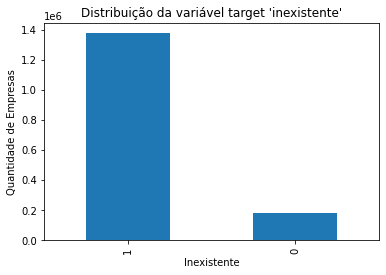

In [51]:
# Visualizando a distribuição graficamente:
ax = empresas_df['inexistente'].value_counts().plot.bar(title="Distribuição da variável target 'inexistente'")
ax.set_xlabel("Inexistente")
ax.set_ylabel("Quantidade de Empresas")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNu

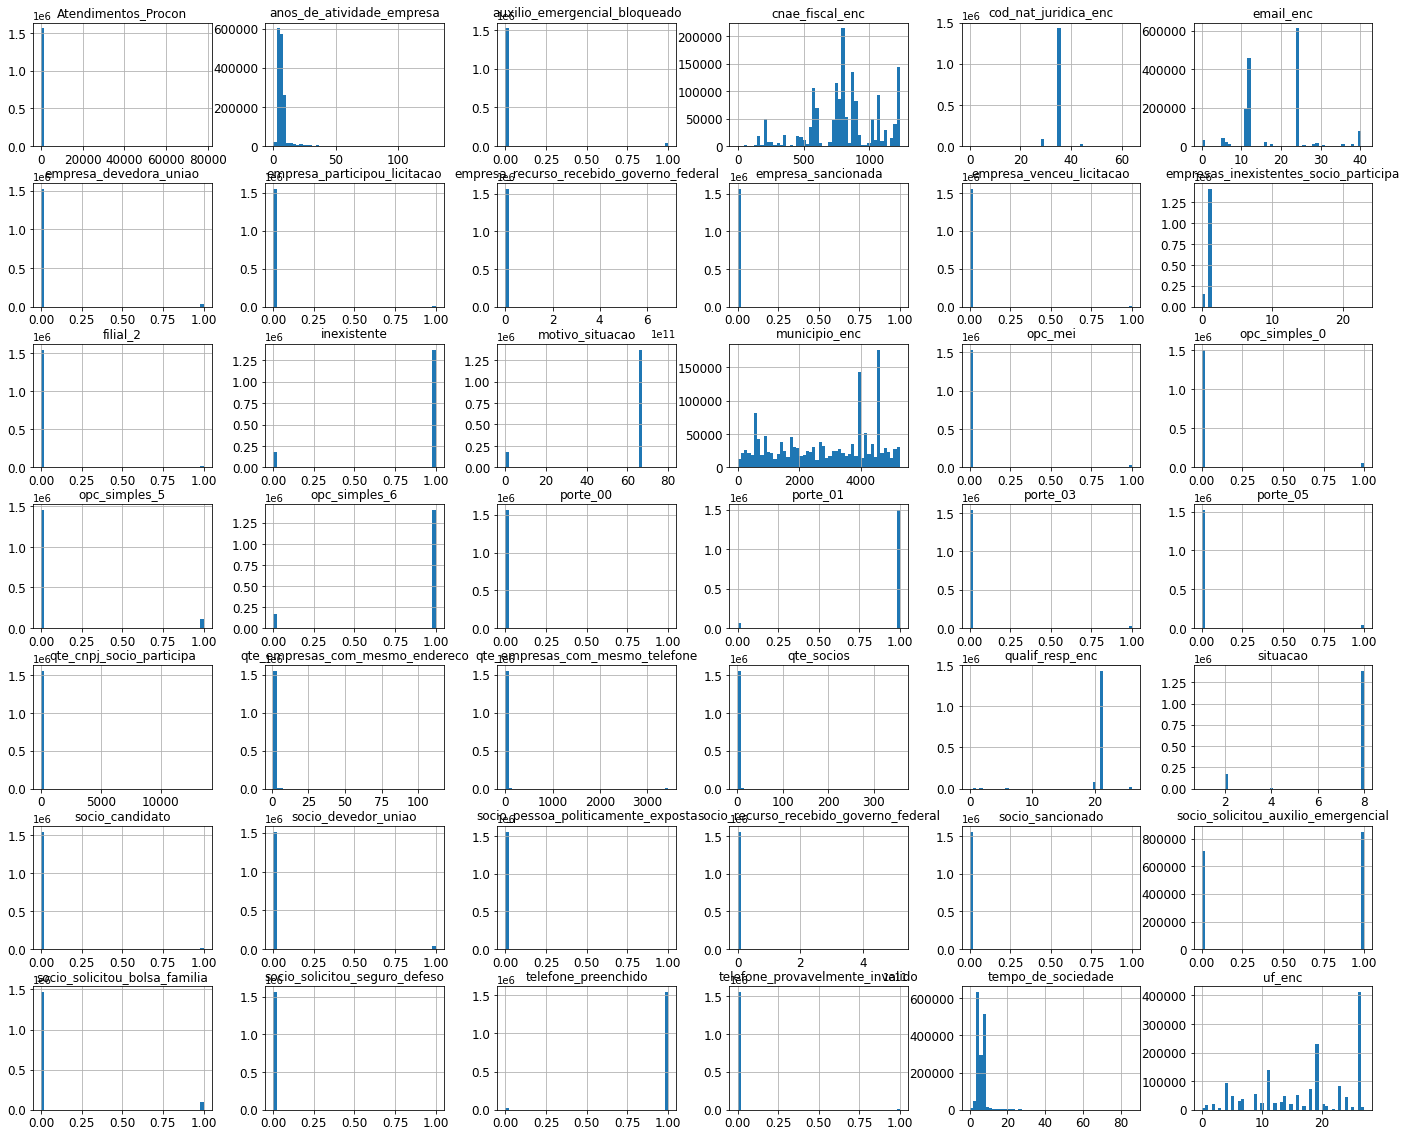

In [52]:
# Vamos visualizar distribuição das variáveis:
fig, ax = plt.subplots(1, 1, figsize=(24, 20))
empresas_df.hist(ax=ax, bins=50, xlabelsize=12, ylabelsize=12);

Verificamos:<br>
* que os dados estão desbalanceados na variável target. Há muito mais empresas inexistentes (88,2%) do que existentes (11,8%);
* as variáveis anos_de_atividade_empresa, cnae_fiscal_enc, email_enc, municipio_enc, tempo_de_sociedade, socio_solicitou_auxilio_emergencial e uf_enc são as que têm maior distribuição dos dados;
* a maioria das demais variáveis possui grande concentração lateral (há muitas variáveis binárias, com concentração ora  à esquerda em 0, ora à direita em 1).<br><br>
Mais a frente será avaliada a necessidade de rebalanceamento dos dados, vamos primeiro verificar a performance para a classe minoritária (existente=0).

### Analisando algumas variáveis que chamaram a atenção:

##### Análise de 'Atendimentos_Procon', 'anos_de_atividade_empresa' e 'empresa_participou_licitacao':

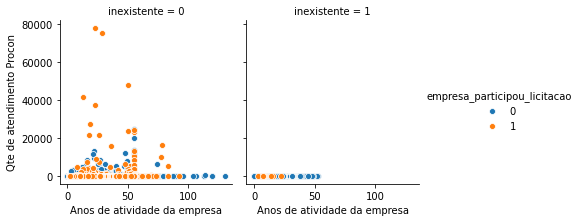

In [53]:
g = sns.FacetGrid(empresas_df, col="inexistente", hue="empresa_participou_licitacao")
g.map_dataframe(sns.scatterplot, x="anos_de_atividade_empresa", y="Atendimentos_Procon")
g.set_axis_labels("Anos de atividade da empresa", "Qte de atendimento Procon")
g.add_legend()

O gráfico acima mostra que, em regra, empresas baixadas por inexistência de fato não manifestam relação com consumidores (zero ou próximo de zero atendimentos nos Procons).<br>Ele também evidencia algumas outras informações:<br>
* Empresas existentes de fato possuem mair tempo de atividade (>100 anos). Obs: é surpreendente que empresas inexistentes cheguem a 50 anos de 'atividade' (fictícia);
* As empresas existentes de fato mais duradouras (>100 anos) em regra não participaram de licitação pública (com o Governo Federal);
* Empresas inexistentes de fato também participam de licitação (fraudes?). E são empresas mais à esquerda na linha de 'anos de atividades'.

Enfim, as variáveis em questão parecem ter sido boas escolhas para análise no modelo.

##### Análise de 'cod_nat_juridica_enc', 'cnae_fiscal_enc' e 'opc_mei'.

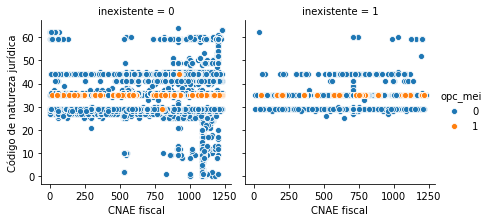

In [54]:
g = sns.FacetGrid(empresas_df, col="inexistente", hue="opc_mei")
g.map_dataframe(sns.scatterplot, x="cnae_fiscal_enc", y="cod_nat_juridica_enc")
g.set_axis_labels("CNAE fiscal", "Código de natureza jurídica")
g.add_legend()

O gráfico acima mostra que as empresas inexistentes (inexistente=1) estão concentradas em um grupo mais específico de 'códigos de natureza jurídica' (estão mais acima no gráfico da direita). Lembrando que a classe de empresas inexistentes é bem maior que a classe de empresas existentes em nosso dataset.<br>Isso pode ser por alguns motivos:<br>
* Talvez a Receita Federal tenha se concentrado em baixar de ofício empresas de determinadas naturezas jurídicas. Isso poderia enviesar o modelo;
* Talvez determinados grupos de naturezas jurídicas sejam 'preferidos para abertura de empresas inexistentes'... por exemplo, para uma fraude em licitação seria preferível abrir uma empresa com natureza jurídica 'Empresa Individual de Responsabilidade Limitada - EIRELI', que exigiria um só 'laranja', do que uma empresa 'Sociedade Empresária Limitada - LTDA', que requer pelo menos dois sócios, ou menos ainda uma S/A;
* Talvez empresas de determinados grupos de natureza jurídica acabem 'morrendo' mais facilmente, e sendo 'abandonadas' por seu sócio, como por exemplo os CNPJ de 'Micro empresário individual - MEI', que são comumente abertos por autônomos e informais para obtenção de benefícios previdenciários, e acabam sendo esquecidos em termos fiscais.

Vamos analisar os códigos de natureza jurídica das empresas:

In [55]:
x = len(set(empresas_df[empresas_df.inexistente==1].cod_nat_juridica)
        .difference(set(empresas_df[empresas_df.inexistente==0].cod_nat_juridica)))
print('Naturezas jurídicas de empresas inexistentes que não estão no subset de empresas existentes:', x)
x = len(set(empresas_df[empresas_df.inexistente==0].cod_nat_juridica)
        .difference(set(empresas_df[empresas_df.inexistente==1].cod_nat_juridica)))
print('Naturezas jurídicas de empresas existentes que não estão no subset de empresas inexistentes:', x)

Naturezas jurídicas de empresas inexistentes que não estão no subset de empresas existentes: 0
Naturezas jurídicas de empresas existentes que não estão no subset de empresas inexistentes: 47


Pelos números acima, percebe-se que o subset de empresas existentes possui todos os códigos de natureza jurídica que existem no subset de empresas inexistentes. Possui inclusive 47 códigos a mais, que não existem neste.<br>
Considerando as análises, e também o fato de que o dataset poderá ser balanceado para igualar a quantidade de registro nas classes, a coluna de 'cod_nat_juridica_enc' será mantida para análise no modelo.

Ainda sobre o gráfico anterior, o eixo do 'CNAE fiscal' mostra uma boa distribuição, tanto para empresas existentes quanto inexistentes. A variável será mantida para análise do modelo.

### Correlação entre as variáveis:

In [56]:
# Vamos ver a correlação das variáveis:
corr = empresas_df.corr()
corr

,situacao,motivo_situacao,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc,porte_01,porte_03,porte_05,porte_00,opc_simples_0,opc_simples_5,opc_simples_6,email_enc
situacao,1.000000,0.956317,-0.376063,0.960668,-0.500247,0.003256,-0.015430,-0.383201,-0.217619,-0.240224,-0.004610,-0.035881,-0.339018,-0.253790,-0.007372,0.107804,0.080475,-0.018330,-0.165653,0.778928,-0.064057,-0.050106,-0.005649,0.006952,-0.015797,0.014080,0.233778,0.014038,-0.217377,0.233548,-0.075072,-0.007502,0.021248,0.278134,0.547746,-0.323123,-0.435708,-0.003494,-0.446764,-0.774318,0.912155,0.078421
motivo_situacao,0.956317,1.000000,-0.366691,0.969831,-0.488862,0.002503,-0.015802,-0.372245,-0.213678,-0.235783,-0.004497,-0.033848,-0.346534,-0.239630,-0.006884,0.111302,0.082193,-0.017718,-0.174074,0.770538,-0.070229,-0.050835,-0.005722,0.007534,-0.015903,0.014412,0.245371,0.014352,-0.245018,0.245566,-0.074206,-0.009969,0.021455,0.287101,0.555187,-0.323245,-0.444676,-0.004986,-0.463965,-0.755806,0.906894,0.080041
opc_mei,-0.376063,-0.366691,1.000000,-0.360781,-0.062019,0.001766,-0.000742,-0.018166,-0.007456,-0.007749,-0.000215,-0.001794,-0.017119,-0.078595,0.006737,0.012999,-0.023745,0.004755,-0.007410,-0.339433,-0.003356,-0.001114,-0.000274,-0.002730,-0.001299,-0.004052,0.013885,-0.006599,-0.011941,0.012203,0.089047,-0.006903,-0.009629,0.014214,0.027496,-0.015885,-0.022112,-0.000260,-0.024699,0.485787,-0.391275,-0.054327
inexistente,0.960668,0.969831,-0.360781,1.000000,-0.507789,0.004300,-0.015585,-0.403233,-0.210636,-0.232675,-0.004428,-0.036436,-0.347283,-0.253368,-0.007066,0.106773,0.083304,-0.018003,-0.177636,0.803156,-0.069305,-0.050590,-0.005647,0.008531,-0.016476,0.014881,0.261913,0.014408,-0.232480,0.243022,-0.075164,-0.008759,0.021811,0.290377,0.561087,-0.322473,-0.452458,-0.002322,-0.477587,-0.744156,0.905242,0.077454
anos_de_atividade_empresa,-0.500247,-0.488862,-0.062019,-0.507789,1.000000,-0.020449,0.030366,0.404198,0.216844,0.227334,0.013296,0.038903,0.333656,0.602999,-0.007026,-0.103406,-0.056435,0.015742,0.166178,-0.394788,0.095038,0.057241,0.008278,-0.003810,0.017117,-0.022514,-0.486622,-0.011419,0.135636,-0.251123,-0.016833,0.014734,-0.006562,-0.383124,-0.544744,0.237548,0.493592,0.000693,0.519608,0.202231,-0.477336,0.019896
telefone_provavelmente_invalido,0.003256,0.002503,0.001766,0.004300,-0.020449,1.000000,0.001072,-0.003981,-0.002275,-0.002373,-0.000116,0.000936,-0.003894,-0.024177,0.000735,-0.003774,0.003738,-0.001173,0.001225,0.002814,-0.001024,-0.001152,-0.000152,0.003382,0.000167,0.670303,0.008594,0.011151,-0.003428,0.005108,0.001128,0.012099,0.011504,0.004938,0.002493,0.000882,-0.003673,-0.000145,-0.002271,-0.001320,0.002451,0.032525
Atendimentos_Procon,-0.015430,-0.015802,-0.000742,-0.015585,0.030366,0.001072,1.000000,0.030778,0.046579,0.042492,0.164252,0.000153,0.072589,0.000428,-0.000851,-0.006148,-0.001430,0.001613,0.005702,-0.015465,0.126402,0.016287,0.000054,-0.000143,-0.000052,-0.000161,-0.001158,0.000953,0.002772,-0.017575,0.000790,0.003555,0.001618,-0.039094,-0.026844,-0.000477,0.033082,-0.000011,0.029976,-0.001344,-0.016666,-0.001167
empresa_devedora_uniao,-0.383201,-0.372245,-0.018166,-0.403233,0.404198,-0.003981,0.030778,1.000000,0.107650,0.122987,0.008716,0.049085,0.169551,0.220256,0.010251,-0.046142,-0.036042,0.010977,0.242436,-0.311

Visualizando a correlação graficamente, em um mapa de calor:

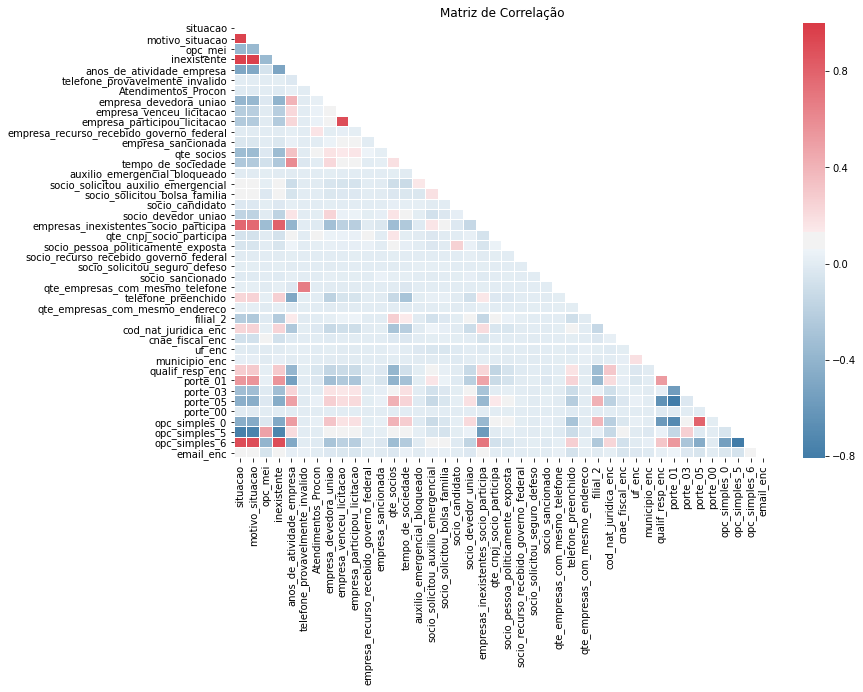

In [57]:
# Criando uma máscara da diagonal superior
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, as_cmap=True)
# Plotar matriz de correlação
plt.figure(figsize=(12,8))
plt.title("Matriz de Correlação")
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=0.1)
plt.show()

In [58]:
# Verificando as maiores correlações (>0.9):
corr_df = corr.abs().unstack().sort_values(ascending = False).reset_index()
corr_df[(corr_df.level_0!=corr_df.level_1)&(corr_df.iloc[:, 2]>0.9)]

,level_0,level_1,0
42,motivo_situacao,inexistente,0.969831
43,inexistente,motivo_situacao,0.969831
44,inexistente,situacao,0.960668
45,situacao,inexistente,0.960668
46,motivo_situacao,situacao,0.956317
47,situacao,motivo_situacao,0.956317
48,situacao,opc_simples_6,0.912155
49,opc_simples_6,situacao,0.912155
50,opc_simples_6,motivo_situacao,0.906894
51,motivo_situacao,opc_simples_6,0.906894


As correlações que mais chamaram a atenção:<br>
* forte correlação entre as variáveis 'inexistente', 'situacao' e 'motivo_situacao';
* forte correlação entre as variáveis 'opc_simples_6' e 'inexistente';
* forte correlação entre as variáveis 'empresa_participou_licitacao' e 'empresa_venceu_licitacao'.

De fato, as variáveis 'situação' e 'motivo_situacao' estão bastante enviesadas, pois as empresas inexistentes de fato (inexistente=1) compartilham de situação cadastral e motivo de situação cadastral comuns. Vamos removê-las:

In [59]:
empresas_df = empresas_df.drop(columns=['situacao', 'motivo_situacao'])

Sobre a variável 'opc_simples_6', verificou-se pelo dicionário de dados que ela corresponde à empresa excluída do Simples. Não podemos exclui-la do modelo, pois as empresas existentes de fato também possuem casos de 'excluídas do simples' (verificou-se que são 14,56% conforme mostrado abaixo).

In [60]:
# Distribuição da 'opc_simples_6' para as empresas existentes (inexistente=0)
existentes_excl_simples_df = empresas_df[empresas_df.inexistente==0]
                                        .opc_simples_6.value_counts()
print(existentes_excl_simples_df)
print('No contexto de empresas existentes, as empresas excluídas do Simples' +
      'correspondem a {}%'.format(existentes_excl_simples_df[1]*100/
       (existentes_excl_simples_df[0] + existentes_excl_simples_df[1])))

0    157250
1     26816
Name: opc_simples_6, dtype: int64
No contexto de empresas existentes, as empresas excluídas do Simples correspondem a 14.568687318679169%


E, por fim, sobre as variáveis 'empresa_participou_licitacao' e 'empresa_venceu_licitacao', também serão mantidas. Elas representam comportamentos diferentes, que desejamos serem analisados. Por exemplo, o fato de uma empresa participar de várias licitações e nunca ter vencido é um conhecido indício de empresa fictícia (inexistente de fato), criada justamente para maquiar licitações. Se eliminarmos a variável 'empresa_venceu_licitacao', perdemos a influência dessa situação na classificação de empresa inexistente de fato.<br>E se eliminarmos 'empresa_participou_licitacao', perdemos o contexto que distinque as empresas que nunca venceram uma licitação daquelas que nunca sequer participaram de licitação.

Vamos aprofundar a análise sobre a correlação das variáveis, focando agora na variável target ('inexistente'):

In [61]:
# Verificando a correlação entre as variáveis e a variável target 'inexistente'
corr = empresas_df.corr()
corr['inexistente'][:-1].sort_values(ascending=False)

inexistente                                 1.000000
opc_simples_6                               0.905242
empresas_inexistentes_socio_participa       0.803156
porte_01                                    0.561087
qualif_resp_enc                             0.290377
telefone_preenchido                         0.261913
cod_nat_juridica_enc                        0.243022
socio_solicitou_auxilio_emergencial         0.106773
socio_solicitou_bolsa_familia               0.083304
municipio_enc                               0.021811
qte_empresas_com_mesmo_telefone             0.014881
qte_empresas_com_mesmo_endereco             0.014408
socio_solicitou_seguro_defeso               0.008531
telefone_provavelmente_invalido             0.004300
porte_00                                   -0.002322
empresa_recurso_recebido_governo_federal   -0.004428
socio_recurso_recebido_governo_federal     -0.005647
auxilio_emergencial_bloqueado              -0.007066
uf_enc                                     -0.

A seguir, vamos analisar as variáveis da ponta de correlação positiva e depois da ponta de correlação negativa:

A variável 'opc_simples_6' já foi analisada pouco acima. Foi decidido mantê-la para análise do modelo.

A variável 'empresas_inexistentes_socio_participa' também possui uma alta correlação positiva com a variável target 'inexistente' (0.803156). Por se tratar de uma variável que manifesta um reflexo de comportamento do sócio, vamos analisá-la com mais profundidade:

In [62]:
# Vamos identificar a distribuição dos valores dessa variável 
# diferenciando as empresas existentes das inexistentes:
empresas_df.groupby(['inexistente'])
             .empresas_inexistentes_socio_participa.value_counts()

inexistente  empresas_inexistentes_socio_participa
0            0                                         151698
             1                                          32336
             2                                             13
             5                                              7
             4                                              6
             3                                              5
             6                                              1
1            1                                        1374913
             2                                            308
             3                                            128
             5                                            108
             4                                             94
             7                                             84
             6                                             60
             8                                             48
             11    

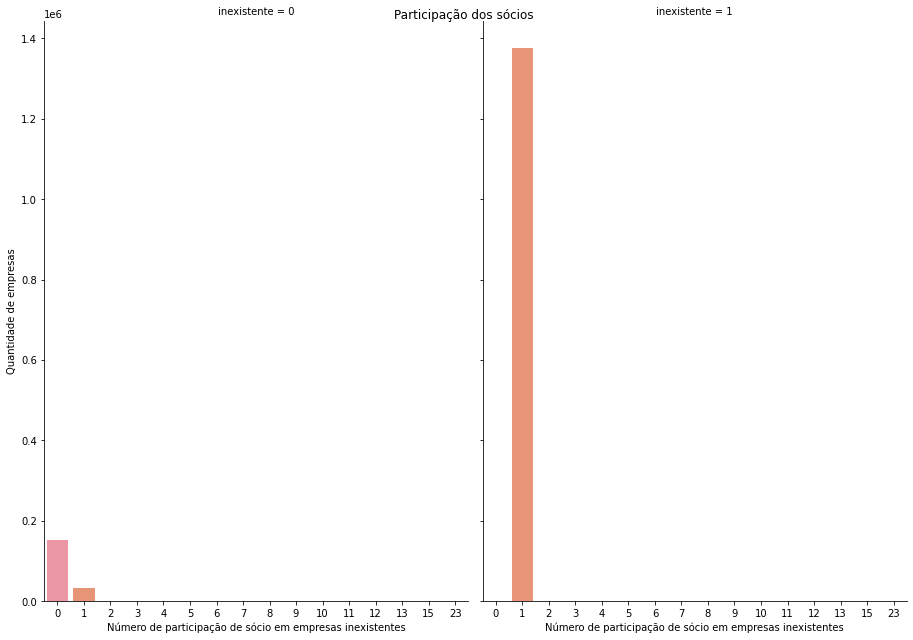

In [63]:
# Representação gráfica dos números anteriores:
g = sns.catplot(x='empresas_inexistentes_socio_participa', col='inexistente', data=empresas_df, kind='count', height=9, aspect=0.7)
g.fig.suptitle('Participação dos sócios')
g.set_ylabels('Quantidade de empresas')
g.set_xlabels('Número de participação de sócio em empresas inexistentes')

Vimos pelos números e gráficos acima que uma empresa inexistente (inexistente=1) sempre terá pelo menos 1 sócio que participa de empresa inexistente (ela mesma). Isso porque não há 'empresas_inexistentes_socio_participa=0' quando 'inexistente=1'.<br> Mas também vimos que existem empresas existentes de fato (inexistente=0) com sócio que participa de empresa inexistente (1: 32336, 2: 13, etc), conforme melhor demonstrado no gráfico abaixo:

Text(0.5, 1.0, 'Participação de sócio (de empresa existente) em empresa inexistente')

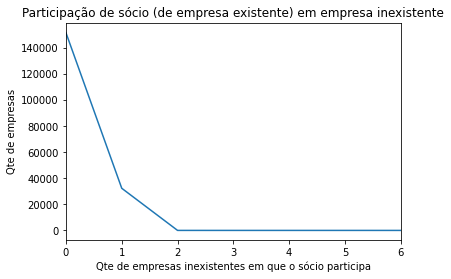

In [64]:
ax =empresas_df[empresas_df.inexistente==0].empresas_inexistentes_socio_participa.value_counts().sort_index().plot.line()
ax.set_xlabel('Qte de empresas inexistentes em que o sócio participa')
ax.set_ylabel('Qte de empresas')
ax.set_title('Participação de sócio (de empresa existente) em empresa inexistente')

Conclusão: a variável 'empresas_inexistentes_socio_participa' é em certo nível enviesada, mas não plenamente como eram 'situacao' e 'motivo_situacao'. Ela deve ser considerada para análise no modelo por representar um comportamento de grande importância na análise comportamental do sócio: o comportamento desviante contumaz (mesmo tendo uma empresa baixada por inexistência de fato, a pessoa registra nova empresa). É algo que desejamos pegar, e pela análise acima, ocorre de fato e é relevante na correlação.

Olhando agora para as correlações negativas, temos a variável 'opc_simples_5' com uma correlação relevante.<br>Conforme dicionário de dados, essa coluna trata-se da identificação se a empresa é optante ou não do Simples. Não pode ser excluída apenas pela existência da coluna 'opc_simples_6', pois a empresa também pode ser não optante do Simples (uma terceira possibilidade em relação ao Simples).<br>Conclusão: 'opc_simples_5' será mantida.

Ainda na ponta de correlação negativa, também temos 'anos_de_atividade_empresa'. Pode ser um indício de que quanto mais antiga a empresa, menor a chance de ela ser inexistente de fato. Vamos manter a variável para análise no modelo.

Por fim, temos também na ponta negativa, a variável 'opc_simples_0', que, conforme dicionário de dados, trata-se de empresa não optante do simples. Poderíamos removê-la, devido à existência de opc_simples_5 e opc_simples_6, mas vamos optar por deixá-la para análise do modelo.

Agora, vamos visualizar a distribuição das demais variáveis, separadamente para empresas existentes e inexistentes:

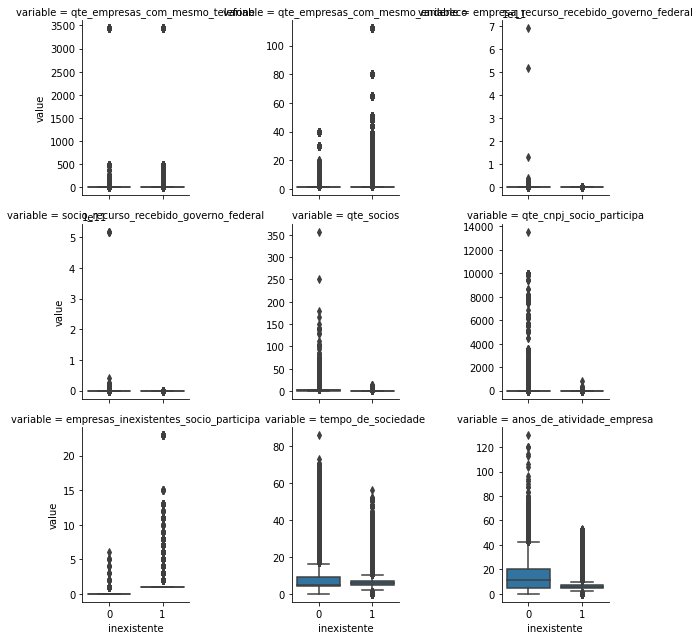

In [65]:
# Variáveis analisadas:
variaveis_df = empresas_df[['qte_empresas_com_mesmo_telefone', 'qte_empresas_com_mesmo_endereco',
'empresa_recurso_recebido_governo_federal', 'socio_recurso_recebido_governo_federal', 
'qte_socios', 'qte_cnpj_socio_participa', 'empresas_inexistentes_socio_participa', 'tempo_de_sociedade', 'anos_de_atividade_empresa', 'inexistente']]
# Constrói a visualização:
melt_df = variaveis_df.melt(id_vars=['inexistente'])
grid = sns.axisgrid.FacetGrid(melt_df[melt_df.variable.isin(variaveis_df.columns)], col='variable', col_wrap=3, sharey=False)
grid.map(sns.boxplot, 'inexistente','value', order=None);

Percebemos:<br>
* existência de outliers em todas as variáveis;
* na variável 'qte_empresa_com_mesmo_telefone', uma distribuição muito parecida em relação às empresas existentes (à esquerda) e inexistentes (à direita);
* empresas inexistentes possuem mais empresas compartilhando o mesmo endereço;
* empresas existentes e seus sócios recebem mais recursos do Governo Federal;
* Sócios de empresas existentes participam de mais empresas, e alcançam um tempo de sociedade maior;
* Tanto sócios de empresas inexistentes quanto de empresas existentes participam de empresas inexistentes, mas o primeiro caso é mais expressivo.

Não vamos mexer nos outliers, pois são dados reais, a maioria vem de novas variáveis criadas através de feature engineering de etapas anteriores, e já receberam os tratamentos necessários.

### Remover variáveis que não serão utilizadas no modelo:

In [66]:
empresas_df = empresas_df.drop(columns=['cnpj', 'razao_social', 'cod_nat_juridica', 'cnae_fiscal', 'uf', 'municipio', 'qualif_resp', 'email_processado'])
# Lembrando que a maioria delas já passou por encoding

Vamos ver como ficou a base:

In [67]:
empresas_df

,opc_mei,inexistente,anos_de_atividade_empresa,telefone_provavelmente_invalido,Atendimentos_Procon,empresa_devedora_uniao,empresa_venceu_licitacao,empresa_participou_licitacao,empresa_recurso_recebido_governo_federal,empresa_sancionada,qte_socios,tempo_de_sociedade,auxilio_emergencial_bloqueado,socio_solicitou_auxilio_emergencial,socio_solicitou_bolsa_familia,socio_candidato,socio_devedor_uniao,empresas_inexistentes_socio_participa,qte_cnpj_socio_participa,socio_pessoa_politicamente_exposta,socio_recurso_recebido_governo_federal,socio_solicitou_seguro_defeso,socio_sancionado,qte_empresas_com_mesmo_telefone,telefone_preenchido,qte_empresas_com_mesmo_endereco,filial_2,cod_nat_juridica_enc,cnae_fiscal_enc,uf_enc,municipio_enc,qualif_resp_enc,porte_01,porte_03,porte_05,porte_00,opc_simples_0,opc_simples_5,opc_simples_6,email_enc
0,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,0,0,1,0,35,475,26,3658,21,1,0,0,0,0,0,1,24
1,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,0,0,1,0,35,746,26,3728,21,1,0,0,0,0,0,1,24
2,0,1,24,0,0,1,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,1,1,1,0,29,711,26,4605,20,1,0,0,0,1,0,0,5
3,0,1,17,0,0,0,0,0,0.00,0,2,20,0,0,0,0,1,2,3,0,0.00,0,0,1,1,1,1,29,711,26,3000,20,1,0,0,0,1,0,0,5
4,0,1,24,0,0,0,0,0,0.00,0,1,5,0,1,0,0,0,1,1,0,0.00,0,0,0,0,1,0,29,710,26,3778,20,1,0,0,0,1,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559938,0,0,53,0,2,0,0,1,5818.65,0,6,6,0,0,0,0,0,0,6,0,0.00,0,0,2,1,1,0,29,814,23,5178,20,0,0,1,0,1,0,0,6
1559939,0,0,39,0,0,1,0,0,0.00,0,30,8,1,1,0,0,1,0,8,0,267066.01,0,0,1,1,1,1,29,346,23,5187,20,0,0,1,0,1,0,0,5
1559940,0,0,55,0,0,0,0,0,0.00,0,4,33,0,0,0,0,0,0,5,0,0.00,0,0,0,0,1,0,29,806,23,5187,20,0,0,1,0,1,0,0,24
1559941,0,0,55,0,0,0,0,0,0.00,0,2,7,0,0,0,0,0,0,3,0,0.00,0,0,0,0,1,0,29,884,23,5187,20,1,0,0,0,0,1,0,24


In [68]:
empresas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559943 entries, 0 to 1559942
Data columns (total 40 columns):
opc_mei                                     1559943 non-null uint8
inexistente                                 1559943 non-null uint8
anos_de_atividade_empresa                   1559943 non-null uint8
telefone_provavelmente_invalido             1559943 non-null uint8
Atendimentos_Procon                         1559943 non-null uint32
empresa_devedora_uniao                      1559943 non-null uint8
empresa_venceu_licitacao                    1559943 non-null uint8
empresa_participou_licitacao                1559943 non-null uint8
empresa_recurso_recebido_governo_federal    1559943 non-null float64
empresa_sancionada                          1559943 non-null uint8
qte_socios                                  1559943 non-null uint32
tempo_de_sociedade                          1559943 non-null int32
auxilio_emergencial_bloqueado               1559943 non-null int8
socio_solicit

Vamos salvar o resultado:

In [69]:
# Salvando resultado
empresas_df.to_csv(r'C:\DATASETS\Empresas Rotuladas\empresas_rotuladas-analise.csv', index=False)